# Desafio de previsão do Titanic

Esse desafio é um dos mais realizados por quem está começando no mundo de data science e consiste em descobrir a partir de alguns dados preditores, como idade e classe, quem sobreviveu no naufrágio do Titanic.

Esse desafio está disponível no Kaggle, junto com diversos outros.

## Conteúdo

Neste notebook, teremos a seguinte ordem:

- Estudo dos dados;
- Análise exploratória;
- Definição do modelo;
- Implementação e avaliação dos algoritmos;
- Conclusão.

# Estudo dos dados

In [1]:
# primeiramente, iremos importar as bibliotecas para realizar a leitura e análise dos dados.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import numpy as np

In [2]:
df = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
teste.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Todos os detalhes das variáveis estão disponíveis na página do desafio no Kaggle, porém vale a pena descrevê-los brevemente.

- PassengerId = Id do passageiro;
- Survived = {0,1}, informa se o passageiro morreu ou sobreviveu, sendo que 0 = morreu e 1 = sobreviveu
- Pclass = {1,2,3}, informa a classe do passageiro;
- Sex = Gênero;
- Age = Idade;
- Sibsp = Quantidade de irmãos/companheiros no Titanic;
- Parch = Quantidade de pais/filhos no Titanic;
- Ticket = Número do ticket;
- Fare = Tarifa paga;
- Cabin = Número da cabine;
- Embarked = {C,Q,S}, informa o ponto de embarque, sendo C = Cherbourg, Q = Queenstown e S = Southampton;

In [5]:
tamanho = df.shape
f'Nosso dataset possui {tamanho[0]} linhas e {tamanho[1]} colunas'

'Nosso dataset possui 891 linhas e 12 colunas'

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Com essa primeira análise obtivemos o tamanho do nosso dataset, os tipos das variáveis, valores estatísticos das variáveis numéricas e quais variáveis têm valores nulos em sua composição, sendo que mais à frente devemos tratar esses valores nulos de alguma forma. Entretanto, é importante notar que algumas variáveis, como PassengerId, está classificada como numérica e os valores fornecidos no método describe não devem ser utilizados nesses casos.

# Análise exploratória

Após o estudo mais geral dos dados, irei realizar a análise exploratória e o tratamento dos dados nulos.

Primeiramente, irei remover os atributos que não irei utilizar nas análises, uma vez que têm nenhuma influência, como no caso dos nomes dos passageiros, e por falta de conhecimento sobre o modo de organização dos tickets e das cabines.

In [11]:
df = df.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Como foi visto acima, temos 177 valores nulos no atributo Age e 2 no Embarked.

Dessa forma, como há cerca de 20% de dados faltantes no Atributo Age, ele será preenchido com mais cuidado. Já no caso do Embarked, os valores nulos serão preenchidos de acordo com a moda.

No caso do atributo Age, irei analisar se a média de idade depende da classe do passageiro, caso afirmativo, irei preencher utilizando a média de cada classe, caso contrário, irei avaliar por meio do gênero.

In [13]:
df.groupby(['Pclass'])['Age'].mean().reset_index()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


Como era de se esperar, as pessoas de 1° classe são mais velhas, enquanto que as mais jovens estão na 3° classe. Assim, o preenchimento do atributo Age será feito conforme as médias de idades acima.

---------------------------------

Iniciando com o preenchimento do Embarked, temos que verificar a disposição dos portos embarcados.

In [14]:
df.groupby(['Embarked'])['PassengerId'].count().reset_index()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


Como o porto com maior quantidade de embarque foi "S" (Southampton), os 2 dados nulos serão preenchidos com o valor "S".

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')

Já para o preenchimento do atributo Age, devemos aplicar filtros, calcular o valor da média e inserir nos valores nulos.

In [16]:
filtro_classe1 = df['Pclass'] == 1
df_classe1 = df.loc[filtro_classe1, ]
media_idade_classe1 = df_classe1['Age'].mean()
media_idade_classe1

38.233440860215055

In [17]:
filtro_classe2 = df['Pclass'] == 2
df_classe2 = df.loc[filtro_classe2, ]
media_idade_classe2 = df_classe2['Age'].mean()
media_idade_classe2

29.87763005780347

In [18]:
filtro_classe3 = df['Pclass'] == 3
df_classe3 = df.loc[filtro_classe3, ]
media_idade_classe3 = df_classe3['Age'].mean()
media_idade_classe3

25.14061971830986

-----------------------------

Com o cálculo das médias de idade de cada classe, podemos atribuir os valores no df original

In [19]:
#df de treino

df.loc[filtro_classe1, 'Age'] = df.loc[filtro_classe1, 'Age'].fillna(media_idade_classe1)
df.loc[filtro_classe2, 'Age'] = df.loc[filtro_classe2, 'Age'].fillna(media_idade_classe2)
df.loc[filtro_classe3, 'Age'] = df.loc[filtro_classe3, 'Age'].fillna(media_idade_classe3)

# df de teste
teste.loc[filtro_classe1, 'Age'] = teste.loc[filtro_classe1, 'Age'].fillna(media_idade_classe1)
teste.loc[filtro_classe2, 'Age'] = teste.loc[filtro_classe2, 'Age'].fillna(media_idade_classe2)
teste.loc[filtro_classe3, 'Age'] = teste.loc[filtro_classe3, 'Age'].fillna(media_idade_classe3)


In [20]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

----------------------------------

Com os valores nulos devidamente preenchidos e feita a remoção de variáveis que não serão utilizadas nas análises, irei criar algumas visualizações para explorar os dados.

## Tipos de variáveis

As colunas Survived, Pclass, Sex, e Embarked são variáveis categóricas, mesmo que algumas estejam em forma numérica, como é o caso de Survived e Pclass. Dessa forma, iremos convertê_las e separá-las das variáveis numéricas para realizar diferentes análises.

In [22]:
colun_categ = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in colun_categ:
    if col in colun_categ:
        df[col] = df[col].astype('object')

In [23]:
df.dtypes

PassengerId      int64
Survived        object
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [24]:
cat_cols = [col for col in df.columns if df[col].dtype == object]
num_cols = [col for col in df.columns if df[col].dtype != object]

In [25]:
quant_categ = [len(df[col].unique()) for col in cat_cols]
quant_categ

[2, 3, 2, 3]

Text(0.5, 1.0, 'Quantidade de categorias por coluna')

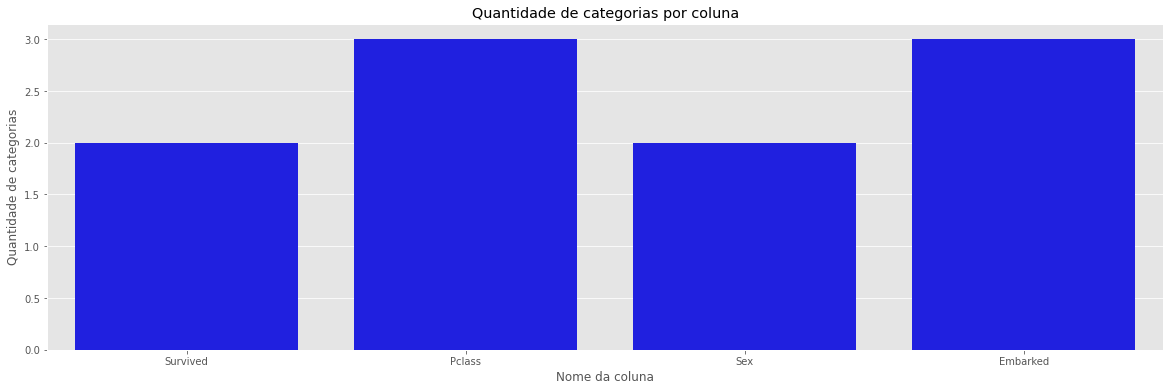

In [26]:
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x=cat_cols, y=quant_categ, color = 'blue')
ax.set_xlabel('Nome da coluna')
ax.set_ylabel('Quantidade de categorias')
ax.set_title('Quantidade de categorias por coluna')

male      0.647587
female    0.352413
Name: Sex, dtype: float64


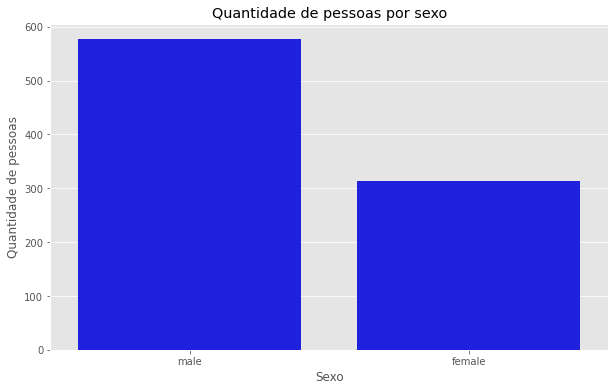

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df['Sex'], color = 'blue')
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Sexo')
ax.set_title('Quantidade de pessoas por sexo')
proporcao_sexo = df['Sex'].value_counts()/len(df)
print(proporcao_sexo)

0    0.616162
1    0.383838
Name: Survived, dtype: float64


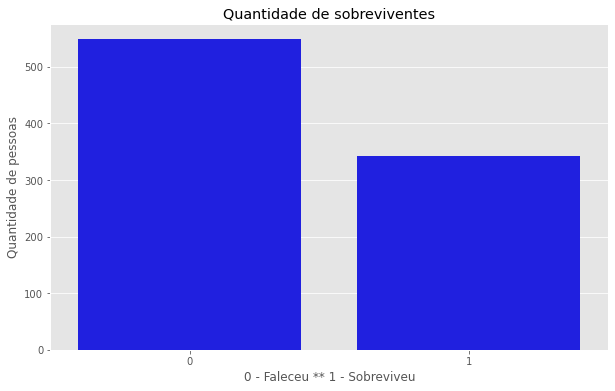

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df['Survived'], color = 'blue')
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('0 - Faleceu ** 1 - Sobreviveu')
ax.set_title('Quantidade de sobreviventes')
proporcao_vida = df['Survived'].value_counts()/len(df)
print(proporcao_vida)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


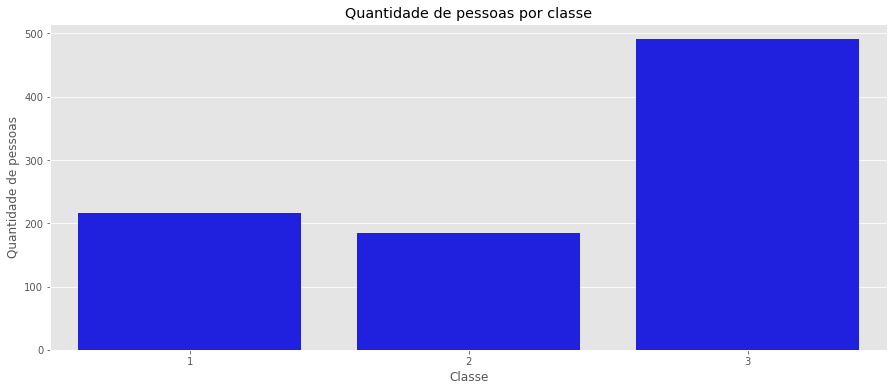

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['Pclass'], color = 'blue')
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Classe')
ax.set_title('Quantidade de pessoas por classe')
proporcao_classe = df['Pclass'].value_counts()/len(df)
print(proporcao_classe)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


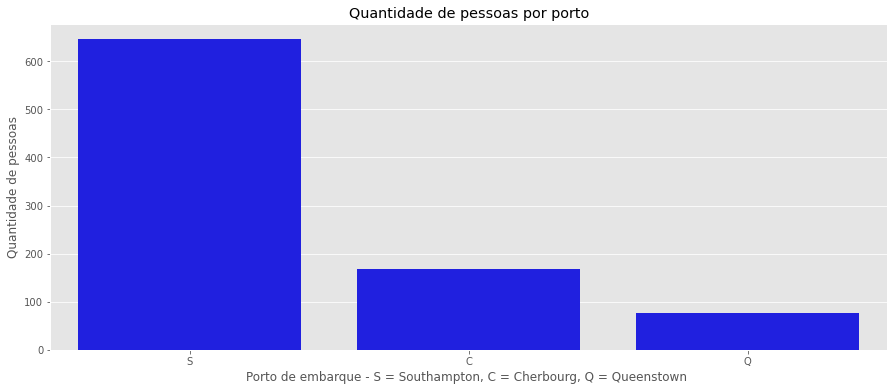

In [30]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x=df['Embarked'], color = 'blue')
ax.set_ylabel('Quantidade de pessoas')
ax.set_xlabel('Porto de embarque - S = Southampton, C = Cherbourg, Q = Queenstown ')
ax.set_title('Quantidade de pessoas por porto')
proporcao_embarked = df['Embarked'].value_counts()/len(df)
print(proporcao_embarked)

### Análise das variáveis numericas

Text(0.5, 1.0, 'Distribuição de idades por classe')

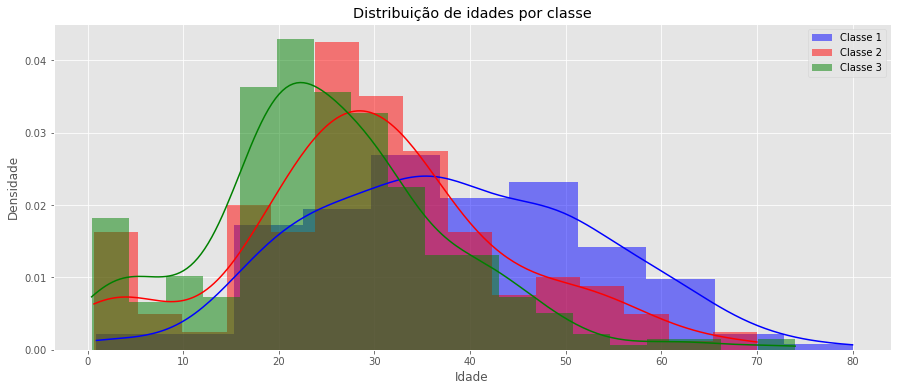

In [31]:
fig, ax = plt.subplots(figsize=(15,6))

sns.histplot(x=df_classe1['Age'], kde=True, stat='density', linewidth=0, label = 'Classe 1', color = 'blue')
sns.histplot(x=df_classe2['Age'], kde=True, stat='density', linewidth=0, label = 'Classe 2', color = 'red')
sns.histplot(x=df_classe3['Age'], kde=True, stat='density', linewidth=0, label = 'Classe 3', color = 'green')
ax.legend()
ax.set_ylabel('Densidade')
ax.set_xlabel('Idade')
ax.set_title('Distribuição de idades por classe')

Text(0.5, 1.0, 'Distribuição do valor do ticket por classe')

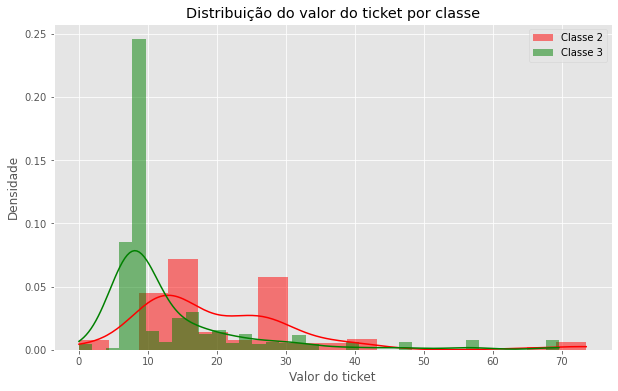

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=df_classe2['Fare'], kde=True, stat='density', linewidth=0, label = 'Classe 2', color = 'red')
sns.histplot(x=df_classe3['Fare'], kde=True, stat='density', linewidth=0, label = 'Classe 3', color = 'green')
ax.legend()
ax.set_ylabel('Densidade')
ax.set_xlabel('Valor do ticket')
ax.set_title('Distribuição do valor do ticket por classe')


Text(0.5, 1.0, 'Distribuição do valor do ticket por classe')

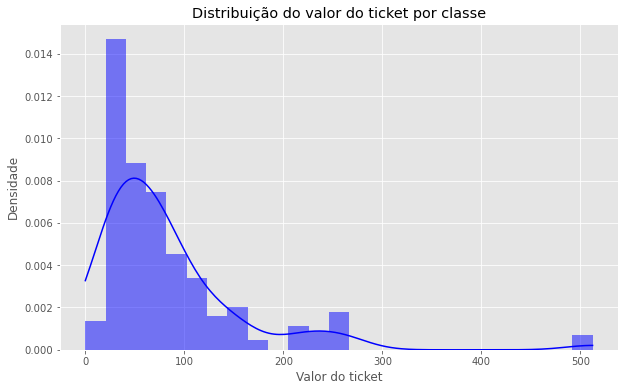

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=df_classe1['Fare'], kde=True, stat='density', linewidth=0, label = 'Classe 1', color = 'blue')
ax.set_ylabel('Densidade')
ax.set_xlabel('Valor do ticket')
ax.set_title('Distribuição do valor do ticket por classe')

Text(0.5, 1.0, 'Quantidade de irmãos/companheiros por classes')

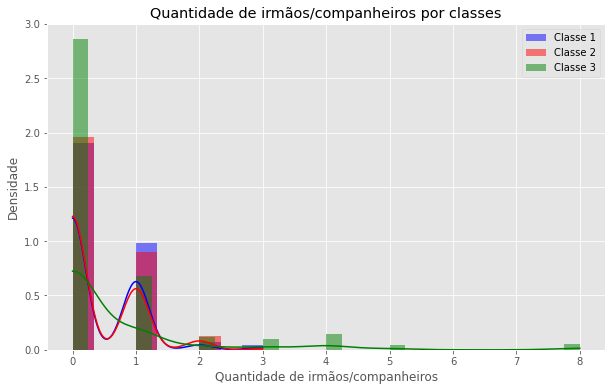

In [34]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=df_classe1['SibSp'], kde=True, stat='density', linewidth=0, label = 'Classe 1', color = 'blue')
sns.histplot(x=df_classe2['SibSp'], kde=True, stat='density', linewidth=0, label = 'Classe 2', color = 'red')
sns.histplot(x=df_classe3['SibSp'], kde=True, stat='density', linewidth=0, label = 'Classe 3', color = 'green')
ax.legend()
ax.set_ylabel('Densidade')
ax.set_xlabel('Quantidade de irmãos/companheiros')
ax.set_title('Quantidade de irmãos/companheiros por classes')

Text(0.5, 1.0, 'Quantidade de pais/filhos por classes')

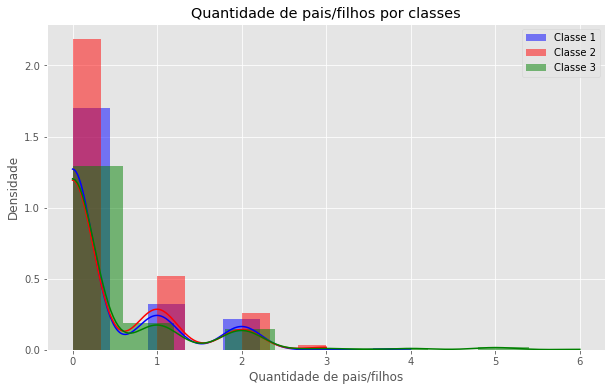

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x=df_classe1['Parch'], kde=True, stat='density', linewidth=0, label = 'Classe 1', color = 'blue')
sns.histplot(x=df_classe2['Parch'], kde=True, stat='density', linewidth=0, label = 'Classe 2', color = 'red')
sns.histplot(x=df_classe3['Parch'], kde=True, stat='density', linewidth=0, label = 'Classe 3', color = 'green')
ax.legend()
ax.set_ylabel('Densidade')
ax.set_xlabel('Quantidade de pais/filhos')
ax.set_title('Quantidade de pais/filhos por classes')


Com essas primeiras visualizações, analisamos a quantidade de categorias em cada atributo categórico e a quantidade de indivíduos em cada uma dessas categorias.
Já nos atributos numéricos, analisamos a distribuição dos atributos os agrupando pela classe. Esse agrupamento poderia ser realizado por qualquer outra variável categórica, como o sexo.

# --------------------------------------------------------------------------------------------------------------

A partir de agora, iremos focar na principal análise, que é estudar as caracteristicas de acordo com o atributo Survived, isto é, saber se o sexo ou a classe da pessoa influencia nas chances de sobrevivência de uma pessoa.

Text(0.5, 1.0, 'Avaliação da chance de sobrevivência por sexo, classe e porto de embarque')

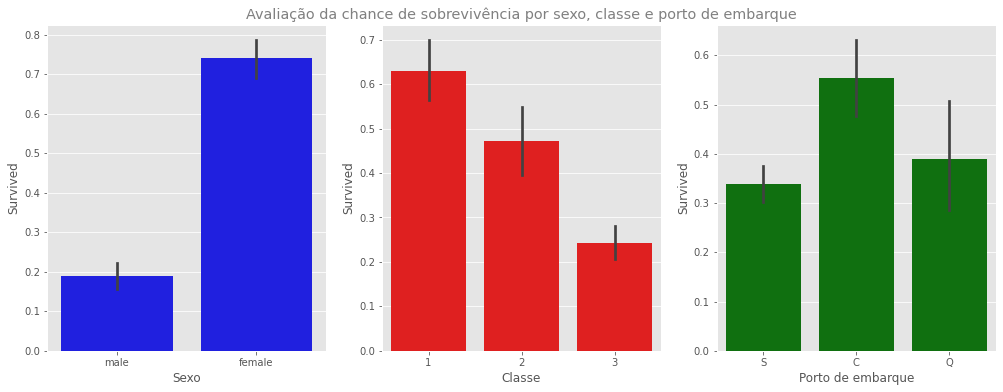

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,6))
sns.barplot(x = df['Sex'], y = df['Survived'], color = 'Blue', ax = ax1)
sns.barplot(x = df['Pclass'], y = df['Survived'], color = 'Red', ax = ax2)
sns.barplot(x = df['Embarked'], y = df['Survived'], color = 'Green', ax = ax3)
ax1.set_xlabel('Sexo')
ax2.set_xlabel('Classe')
ax3.set_xlabel('Porto de embarque')
ax2.set_title('Avaliação da chance de sobrevivência por sexo, classe e porto de embarque', color = 'Grey')

In [37]:
df.groupby(['Sex', 'Survived'])['PassengerId'].count().reset_index()

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [38]:
df.groupby(['Embarked', 'Pclass'])['PassengerId'].count().reset_index()

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,129
7,S,2,164
8,S,3,353


Nesses 3 gráficos podemos ver que as mulheres, as pessoas da 1° classe e quem embarcou no porto de Cherbourg sobreviveram em maior número. Destaca-se a grande diferença da taxa de mulheres para a taxa de homens, mesmo tendo quase o dobro de tripulantes masculinos, sobreviveu o dobro de mulheres em relação ao número de homens. 

A partir da taxa de sobrevivência das pessoas de 1° classe, foi realizada a criação da tabela para estudar como o porto de embarque influenciava nas classes. Temos que o porto de Queenstown embarcou, praticamente, apenas passageiros de 3° classe, sendo um fator que podemos utilizar no nosso algoritmo de previsão.

--------------
Também podemos avaliar a chance de sobrevivência de acordo com a idade. Como houve maior taxa de sobrevivência de pessoas da 1° classe, é provável que as pessoas mais velhas tenham maior taxa de sobrevivência.

Text(0.5, 1.0, 'Distribuição da idade por sobrevivencia')

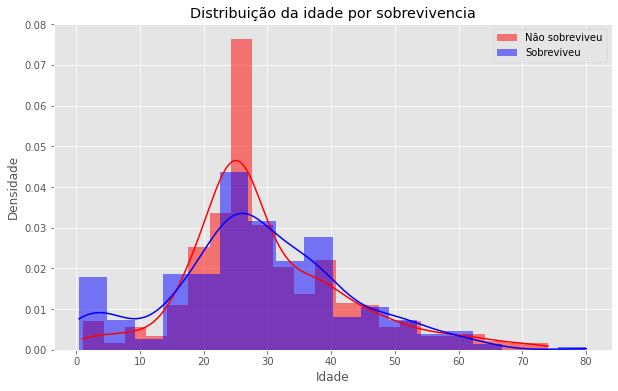

In [39]:
fig, ax = plt.subplots(figsize=(10,6))

filtro_survived0=df['Survived']==0;
df_survived0 = df.loc[filtro_survived0, ]

filtro_survived1=df['Survived']==1;
df_survived1=df.loc[filtro_survived1, ]


sns.histplot(x=df_survived0['Age'], kde=True, stat='density', linewidth=0, label = 'Não sobreviveu', color = 'red')
sns.histplot(x=df_survived1['Age'], kde=True, stat='density', linewidth=0, label = 'Sobreviveu', color = 'blue')
ax.legend()
ax.set_ylabel('Densidade')
ax.set_xlabel('Idade')
ax.set_title('Distribuição da idade por sobrevivencia')

A hipótese de que as pessoas mais velhas  teriam maior taxa de sobrevivência devido à grande taxa de sobrevivência das pessoas de 1° classe não se confirmou, provavelmente, devido à quantidade reduzida de pessoas desta classe. Entretanto, podemos notar um pico de sobrevivência para as crianças e pessoas entre 20 e 35 anos.

In [40]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().reset_index()

,Survived,Pclass,PassengerId
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


Temos que, em valores brutos, mesmo a a 3° classe tendo o dobro de passageiros, houve maior quantidade de sobreviventes para as pessoas da 1° classe.

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

Com essas análises, vimos as correlações entre diversas variáveis e sua taxa de sobrevivência, chegando as seguintes conclusões:

- Pessoas do sexo feminino têm maior taxa de sobrevivência;
- Pessoas da 1° classe têm maior taxa de sobrevivência;
- Pessoas que embarcaram no porto de Cherbourg têm maior taxa de sobrevivência;
- O porto de Queenstown embarcou, praticamente, apenas indivíduos da 3° classe; 
- Crianças e pessoas com idade entre 20 e 35 anos têm maior taxa de sobrevivência.


## Definição do modelo

#### Machine Learning

Nos iremos utilizar algoritmos de aprendizagem supervisionada, uma vez que temos o nosso conjunto de dados rotulados corretamente. Nosso objetivo é descobrir se uma pessoa irá sobreviver ou não, ou seja, uma classificação binária.


Iniciaremos com o algoritmo de Regressão Logística, que irá nos fornecer a probabilidade de pertencimento à classificação binária.

Antes de tudo, é necessário tratarmos os nossos dados que têm o tipo object e transformá-los em dados numéricos.

Para realizar essa tarefa, podemos utilizar uma transformação que irá dar o mesmo peso para todas as categorias, por exemplo,
informar que pessoas do sexo F = 1 e M = 0, ou podemos adicionar pesos, pois, como vimos, pessoas do sexo F têm maiores chances de sobrevivência do que M. Esse é um momento onde a análise exploratória nos fornece grande insights e cabe ao cientista utilizá-la da melhor forma possível.


##### Arrumando as variáveis

Será utilizado o conceito de variáveis dummies para as variáveis categóricas.



Primeiramente, irei juntar os datasets de treino e teste para facilitar nessa transformação e posteriormente irei separá-los novamente

In [41]:
# salvar os indices dos datasets para posterior junção

df_index = df.shape[0]
teste_index = teste.shape[0]

In [42]:
# salvar os passengerid para possibilitar a aplicação no Kaggle

passengerId = teste['PassengerId']

In [43]:
# extrair a coluna survived e excluir ela do dataset de treino (df)

target = df.Survived.copy()
df.drop(['Survived'], axis = 1, inplace = True)

In [44]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [45]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
df_total = pd.concat(objs=[df, teste], axis=0).reset_index(drop=True)

In [47]:
df_total

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Cabin
0,1,3,male,22.00000,1,0,7.2500,S,NaN,NaN,NaN
1,2,1,female,38.00000,1,0,71.2833,C,NaN,NaN,NaN
2,3,3,female,26.00000,0,0,7.9250,S,NaN,NaN,NaN
3,4,1,female,35.00000,1,0,53.1000,S,NaN,NaN,NaN
4,5,3,male,35.00000,0,0,8.0500,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,29.87763,0,0,8.0500,S,"Spector, Mr. Woolf",A.5. 3236,NaN
1305,1306,1,female,39.00000,0,0,108.9000,C,"Oliva y Ocana, Dona. Fermina",PC 17758,C105
1306,1307,3,male,38.50000,0,0,7.2500,S,"Saether, Mr. Simon Sivertsen",SOTON/O.Q. 3101262,NaN
1307,1308,3,male,29.87763,0,0,8.0500,S,"Ware, Mr. Frederick",359309,NaN


Os diversos valores NaN ocorreram devido à seleção de atributos que eu fiz no início do programa para o dataset "df", mas eles não irão ser utilizados nos algoritmos de machine learning.

In [48]:
# selecionando os atributos que não serão utilizados no ML

atributos = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df_total.drop(atributos, axis=1 ,inplace=True)

In [49]:
df_total.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [50]:
fare_median = df_total['Fare'].median()
df_total['Fare'].fillna(fare_median, inplace=True)

In [51]:
df_total.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

---------------------------------------------------

Preparação das variáveis para o algoritmo de machine learning

In [52]:
df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [53]:
# convertendo sexo: {male}:0 e {female}:1

df_total['Sex'] = df_total['Sex'].map({'male':0, 'female':1})

# Como temos 3 casos para Embarked, irei utilizar a função de dummies

embarked_dummies = pd.get_dummies(df_total['Embarked'], prefix='Embarked')
df_total = pd.concat([df_total, embarked_dummies], axis=1)
df_total.drop(['Embarked'], axis=1, inplace=True)

In [54]:
df_total

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.00000,1,0,7.2500,0,0,1
1,1,1,38.00000,1,0,71.2833,1,0,0
2,3,1,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,3,0,35.00000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,29.87763,0,0,8.0500,0,0,1
1305,1,1,39.00000,0,0,108.9000,1,0,0
1306,3,0,38.50000,0,0,7.2500,0,0,1
1307,3,0,29.87763,0,0,8.0500,0,0,1


In [55]:
df_total.dtypes

Pclass         object
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [56]:
df_total['Pclass'] = df_total['Pclass'].astype(int)

In [57]:
# agora que o dataset está pronto para ser aplicado ao modelo, irei voltá-lo a configuração normal de df e teste

df=df_total.iloc[:df_index]
teste=df_total.iloc[df_index:]

In [58]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.00000,1,0,7.2500,0,0,1
1,1,1,38.00000,1,0,71.2833,1,0,0
2,3,1,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,3,0,35.00000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.00000,0,0,13.0000,0,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,3,1,25.14062,1,2,23.4500,0,0,1
889,1,0,26.00000,0,0,30.0000,1,0,0


In [59]:
teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
891,3,0,34.50000,0,0,7.8292,0,1,0
892,3,1,47.00000,1,0,7.0000,0,0,1
893,2,0,62.00000,0,0,9.6875,0,1,0
894,3,0,27.00000,0,0,8.6625,0,0,1
895,3,1,22.00000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,29.87763,0,0,8.0500,0,0,1
1305,1,1,39.00000,0,0,108.9000,1,0,0
1306,3,0,38.50000,0,0,7.2500,0,0,1
1307,3,0,29.87763,0,0,8.0500,0,0,1


### Implementação e avaliação dos algoritmos

##### Regressão logística

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
modelo = LogisticRegression()
modelo.fit(df, target)

ValueError: Unknown label type: 'unknown'

Ocorre o erro pois target está como object

In [ ]:
target = target.astype('int')

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df, target)
acuracia_lr_model = lr_model.score(df, target)
print('Acurácia do Logistic Regression: ', acuracia_lr_model)

In [ ]:
previsao_lr = lr_model.predict(teste)
submission = pd.DataFrame({"PassengerId": passengerId, "Survived": previsao_lr})
submission.to_csv('./submission_lr.csv', index = False)

Score obtido no Kaggle:

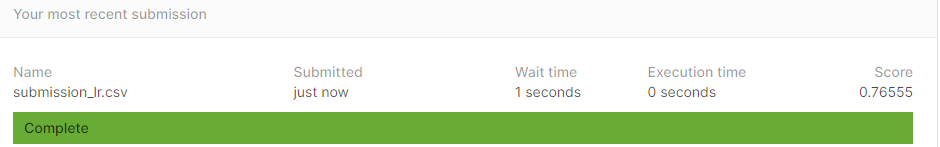

##### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier()
tree_model.fit(df, target)
tree_model.fit(df, target).score(df, target)



In [ ]:
previsao_tree_inf_depth = tree_model.predict(teste)
submission = pd.DataFrame({"PassengerId": passengerId, "Survived": previsao_tree_inf_depth})
submission.to_csv('./submission_previsao_tree_inf_depth.csv', index = False)

Como não foi colocada um limite para de profundidade para a arvore de decisão, temos claramente um overfitting no algoritmo acima.

Resultado no Kaggle:
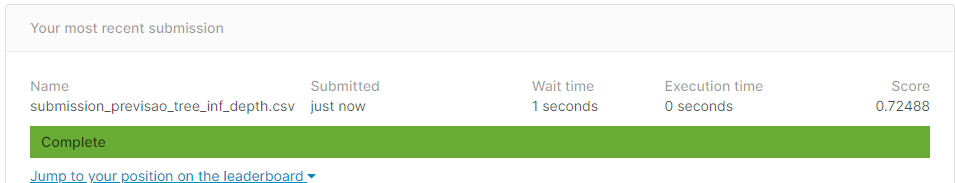

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(df, target)
tree_model.fit(df, target).score(df, target)

In [ ]:
previsao_tree_3_depth = tree_model.predict(teste)
submission = pd.DataFrame({"PassengerId": passengerId, "Survived": previsao_tree_3_depth})
submission.to_csv('./submission_previsao_tree_3_depth.csv', index = False)

Resultado no kaggle:
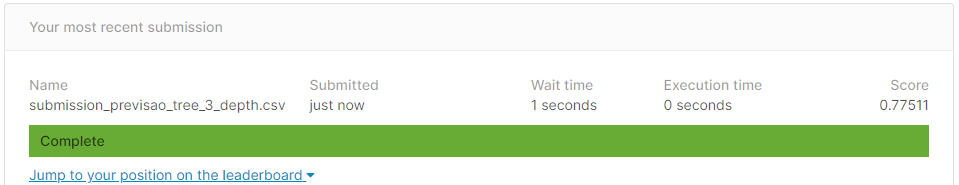


Assim vemos que realmente houve um overfitting ao não limitar a profundidade da árvore

-------------------------------
O que acontece se eu limitar em 1 de profundidade?

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(max_depth=1)
tree_model.fit(df, target)
tree_model.fit(df, target).score(df, target)

In [ ]:
previsao_tree_1_depth = tree_model.predict(teste)
submission = pd.DataFrame({"PassengerId": passengerId, "Survived": previsao_tree_1_depth})
submission.to_csv('./submission_previsao_tree_1_depth.csv', index = False)

eis a resposta:
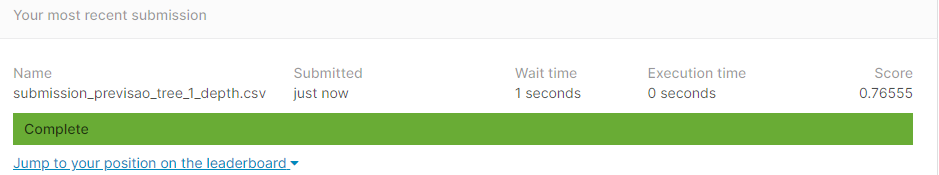

### Conclusão

Neste notebook temos a definição do problema, a análise exploratória e a aplicação de possíveis algoritmos para atingirmos o nosso objetivo.

Nos algoritmos implementados foram utilizados o conceito de variáveis dummies na transformação das variáveis categóricas, mas com a análise exploratória, obtivemos informações importantes, que, futuramente, podem ser utilizadas para melhorar o resultado desses algoritmos. Como foi visto, caso a pessoa seja do sexo feminino suas chances de sobrevivência são muito altas, assim, poderíamos inserir um peso neste parâmetro, assim como utilizar a idade e o porto de embarque.
Outro ponto importante é em relação ao algoritmo de árvore de decisão, caso não seja inserido um limite na sua profundidade, teremos um overfitting.
